## Data loading

### Subtask:
Load the employee data from "employee_data.csv" into a pandas DataFrame.


In [1]:
import pandas as pd

try:
    df = pd.read_csv('employee_data.csv')
    display(df.head())
    display(df.tail())
    display(df.info())
except FileNotFoundError:
    print("Error: 'employee_data.csv' not found. Please ensure the file is in the correct location.")
    df = None # Assign None to df in case of error
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,employee_id,age,gender,marital_status,salary,employment_type,region,has_dependents,tenure_years,enrolled
0,10001,60,Female,Single,55122.97,Part-time,West,No,1.5,0
1,10002,50,Female,Single,89549.66,Full-time,West,Yes,12.8,1
2,10003,36,Male,Divorced,74145.66,Part-time,Midwest,No,3.8,0
3,10004,64,Female,Married,53877.83,Full-time,Northeast,No,3.3,0
4,10005,29,Male,Single,63404.63,Contract,Midwest,Yes,10.0,0


,employee_id,age,gender,marital_status,salary,employment_type,region,has_dependents,tenure_years,enrolled
9995,19996,52,Female,Married,64551.78,Part-time,South,No,0.5,0
9996,19997,37,Male,Widowed,74252.35,Full-time,Northeast,Yes,1.3,1
9997,19998,52,Male,Single,60903.60,Full-time,Midwest,Yes,2.2,1
9998,19999,46,Male,Married,61982.89,Full-time,Midwest,Yes,4.5,1
9999,20000,54,Male,Single,69163.41,Full-time,South,Yes,0.8,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_id      10000 non-null  int64  
 1   age              10000 non-null  int64  
 2   gender           10000 non-null  object 
 3   marital_status   10000 non-null  object 
 4   salary           10000 non-null  float64
 5   employment_type  10000 non-null  object 
 6   region           10000 non-null  object 
 7   has_dependents   10000 non-null  object 
 8   tenure_years     10000 non-null  float64
 9   enrolled         10000 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 781.4+ KB


None

## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


Shape of the DataFrame: (10000, 10)

Missing Values:
employee_id        0
age                0
gender             0
marital_status     0
salary             0
employment_type    0
region             0
has_dependents     0
tenure_years       0
enrolled           0
dtype: int64

Missing Value Percentage:
employee_id        0.0
age                0.0
gender             0.0
marital_status     0.0
salary             0.0
employment_type    0.0
region             0.0
has_dependents     0.0
tenure_years       0.0
enrolled           0.0
dtype: float64

Data Types:
employee_id          int64
age                  int64
gender              object
marital_status      object
salary             float64
employment_type     object
region              object
has_dependents      object
tenure_years       float64
enrolled             int64
dtype: object

Descriptive Statistics for age:
count    10000.0000
mean        43.0020
std         12.2858
min         22.0000
25%         33.0000
50%         43.0000
75

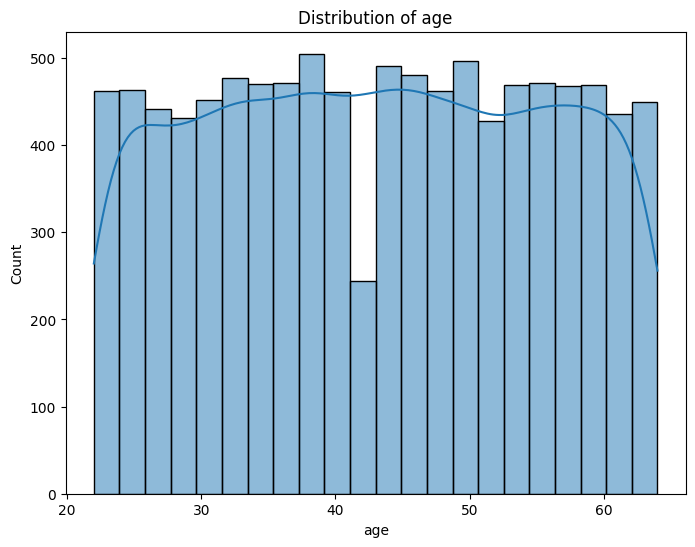

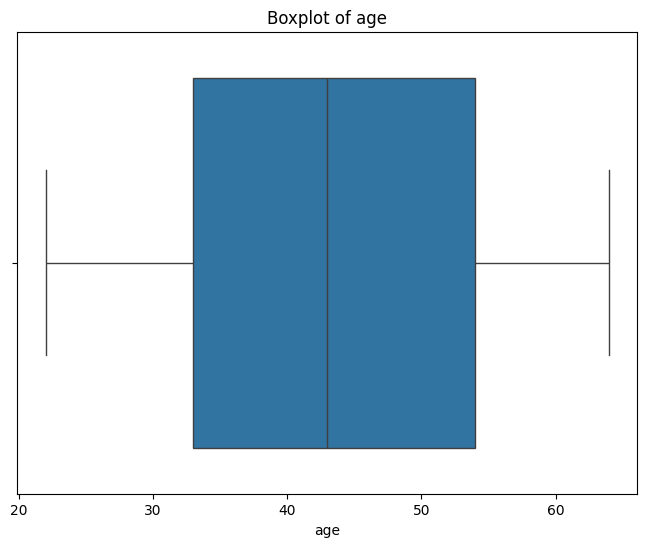


Descriptive Statistics for salary:
count     10000.000000
mean      65032.967907
std       14923.958446
min        2207.790000
25%       54714.342500
50%       65056.050000
75%       75053.687500
max      120312.000000
Name: salary, dtype: float64


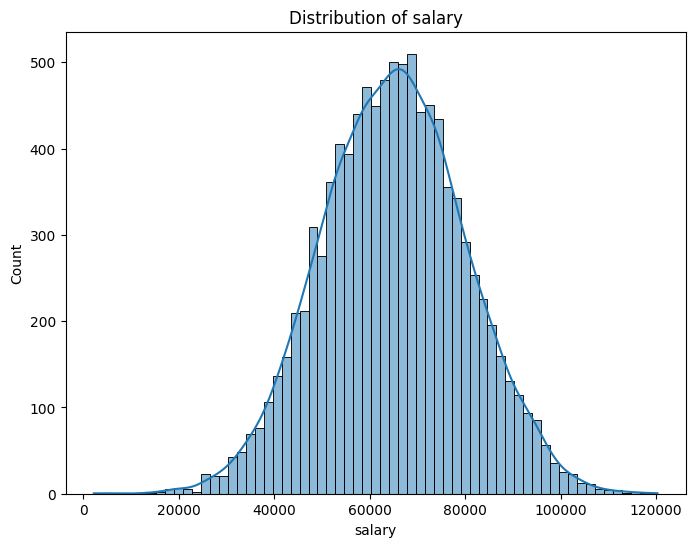

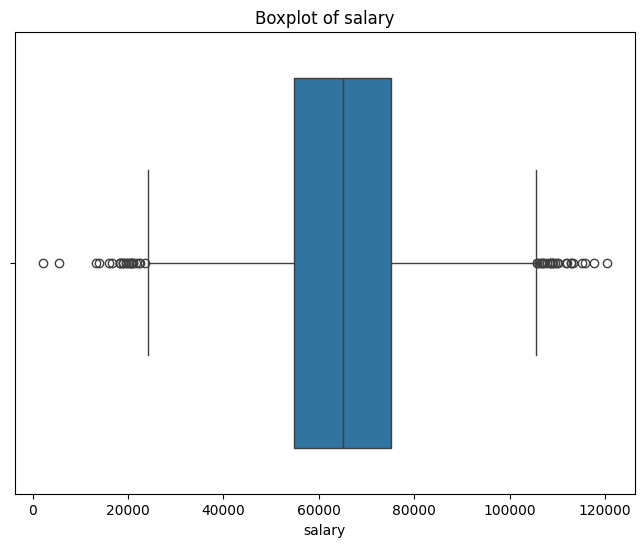


Descriptive Statistics for tenure_years:
count    10000.000000
mean         3.967720
std          3.895488
min          0.000000
25%          1.200000
50%          2.800000
75%          5.600000
max         36.000000
Name: tenure_years, dtype: float64


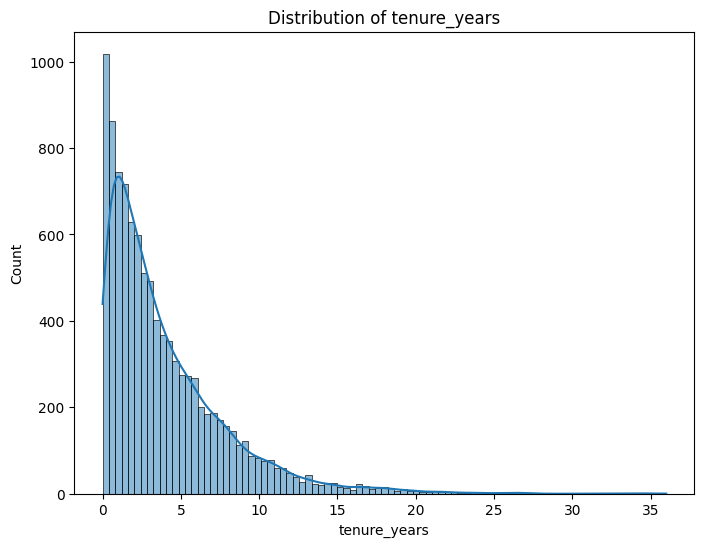

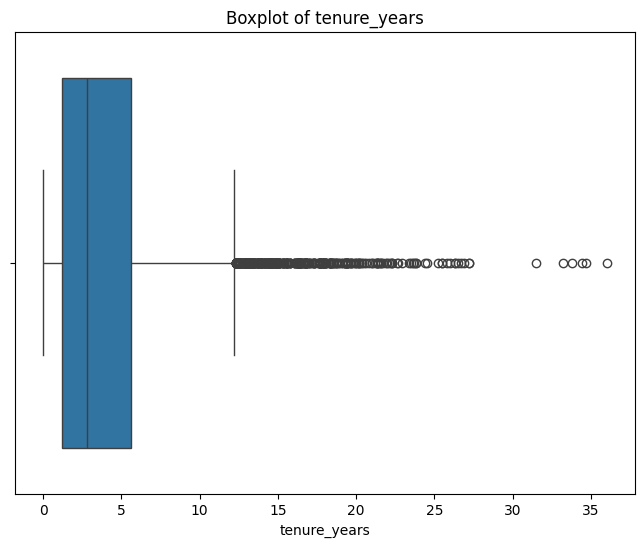

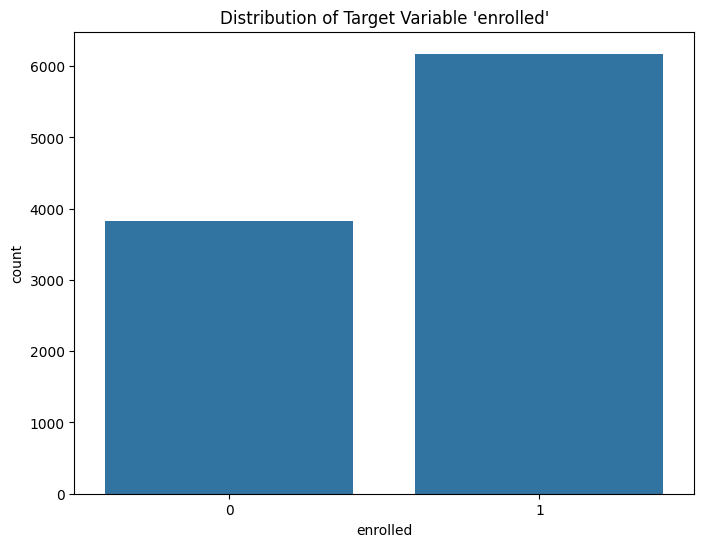


Value Counts for 'enrolled':
enrolled
1    6174
0    3826
Name: count, dtype: int64


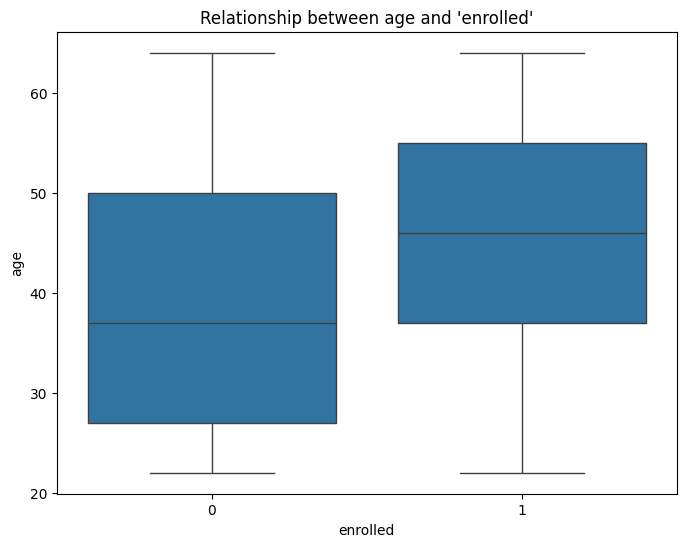

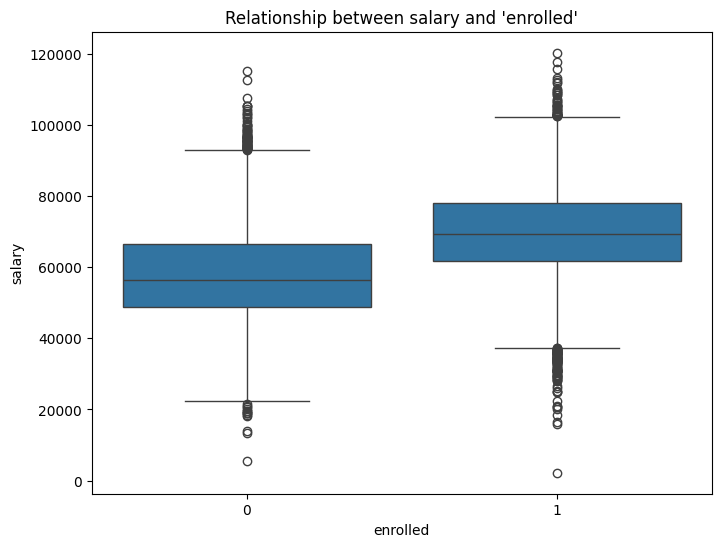

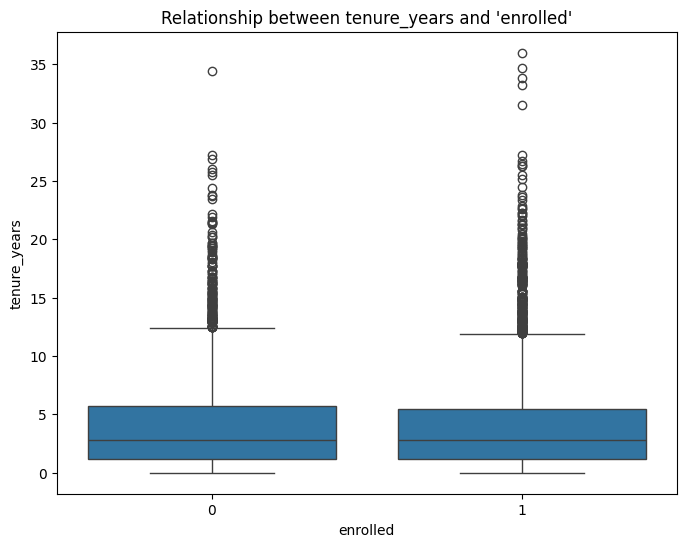

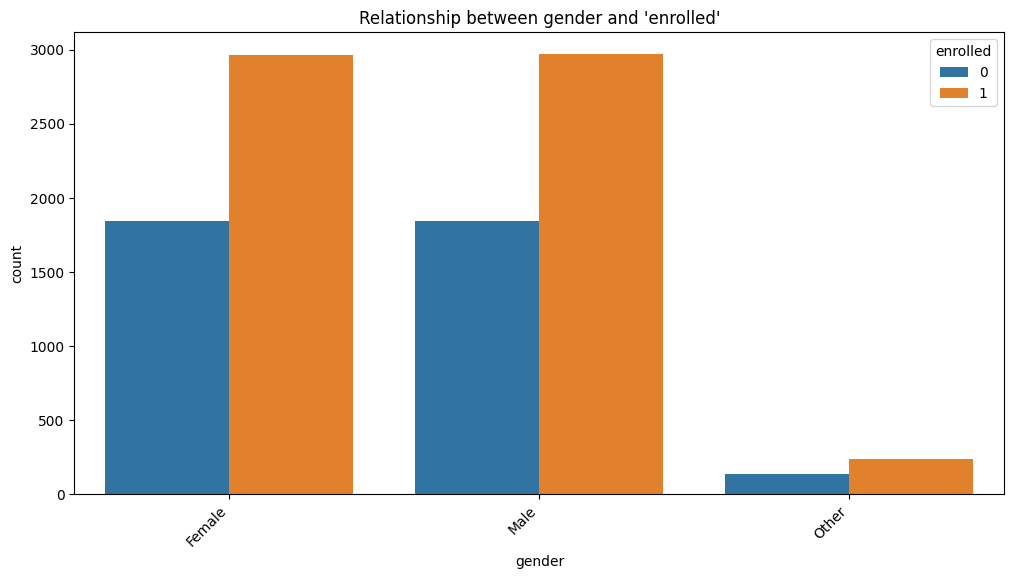

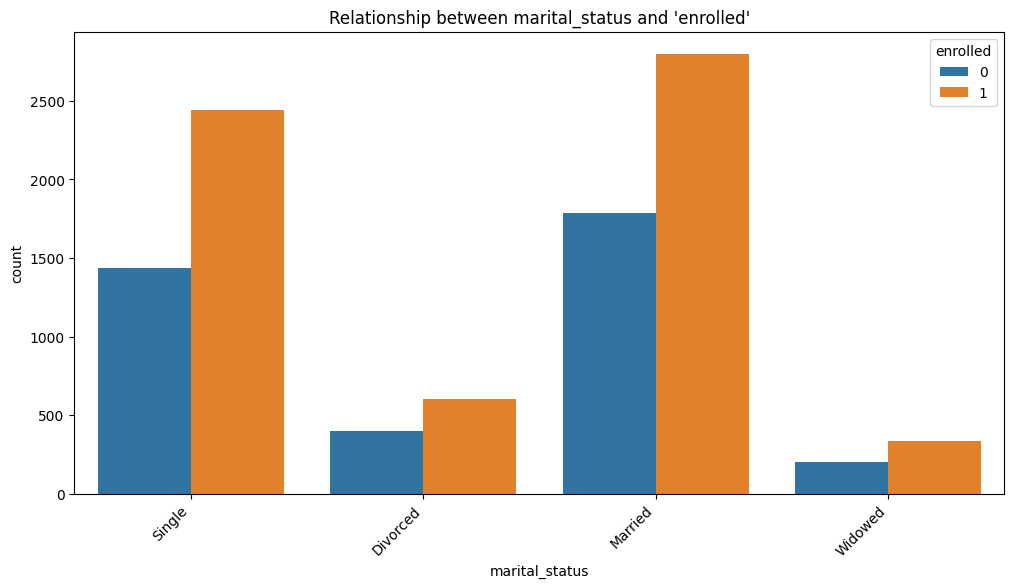

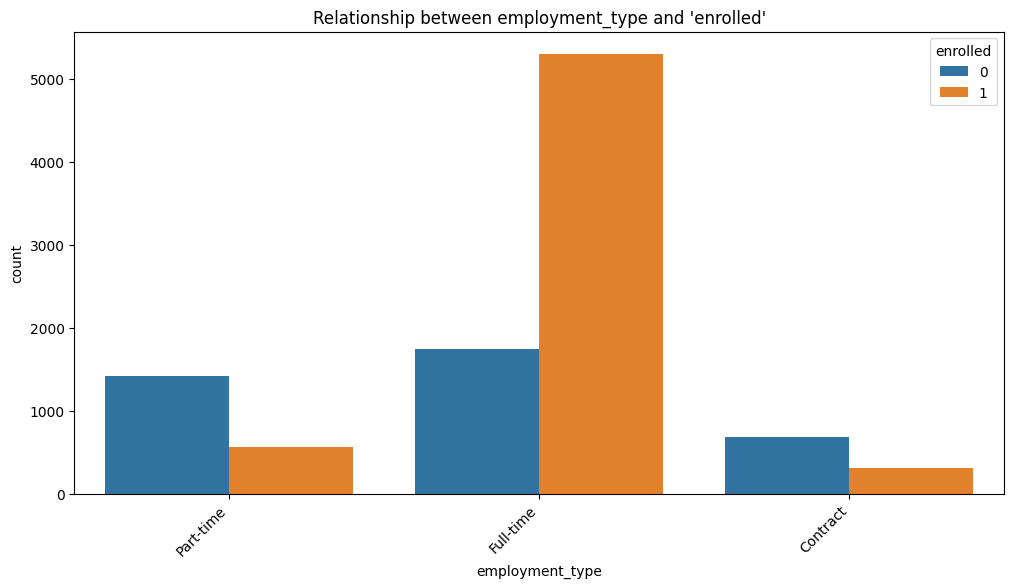

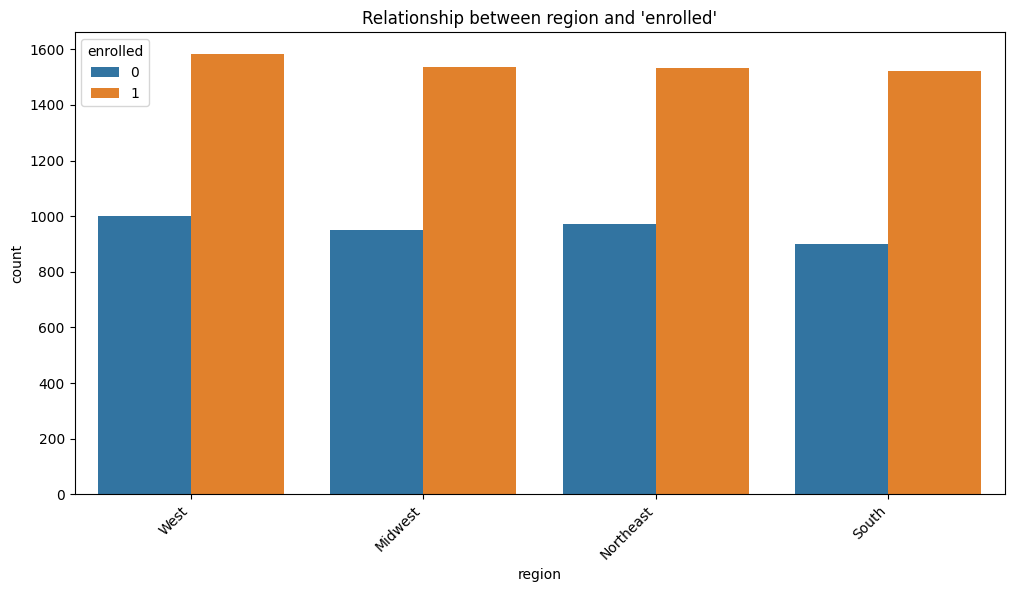

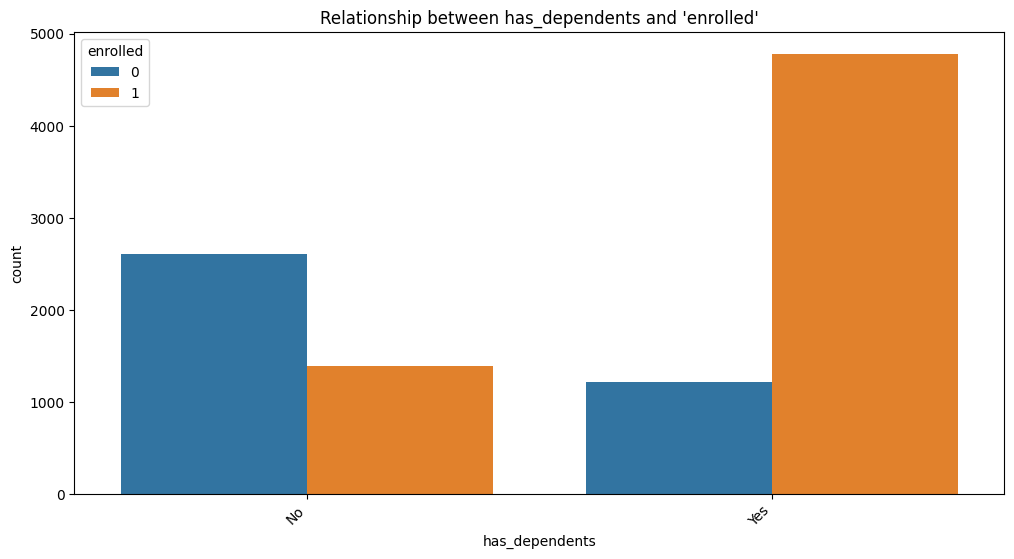


Correlation Matrix:
                   age    salary  tenure_years  enrolled
age           1.000000  0.003872      0.002220  0.268749
salary        0.003872  1.000000     -0.003574  0.366403
tenure_years  0.002220 -0.003574      1.000000 -0.007480
enrolled      0.268749  0.366403     -0.007480  1.000000


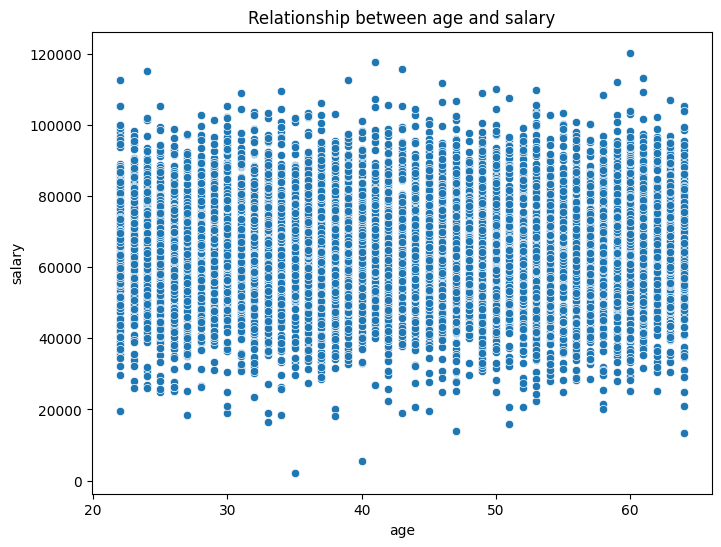

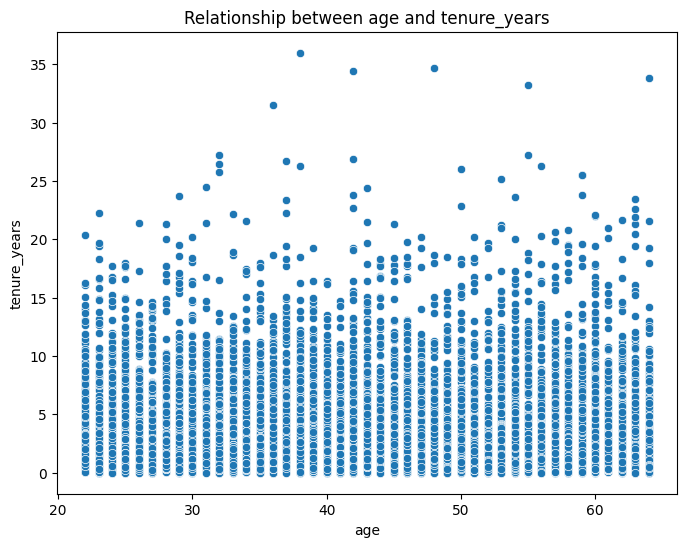

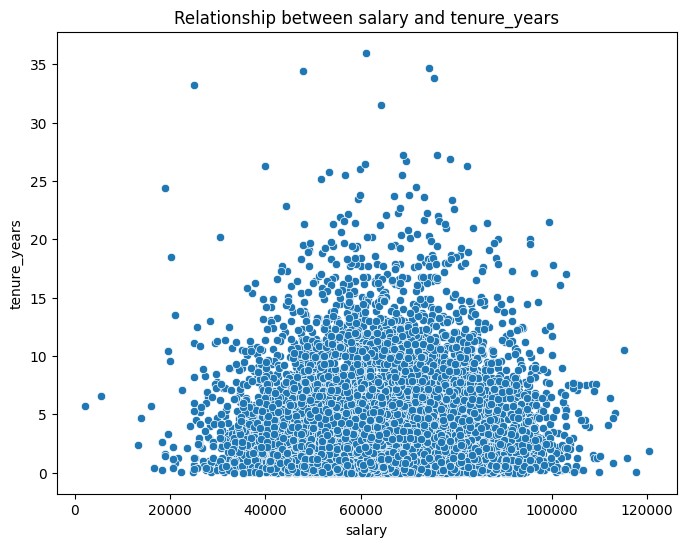

<Figure size 1200x600 with 0 Axes>

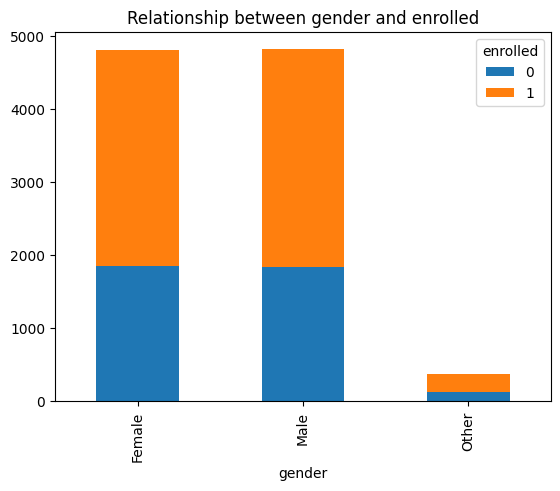

<Figure size 1200x600 with 0 Axes>

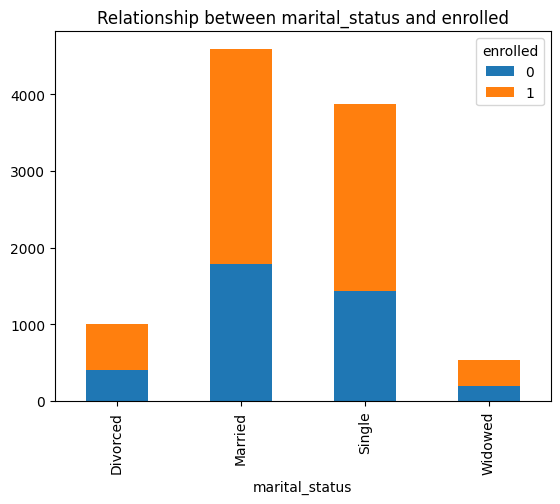

<Figure size 1200x600 with 0 Axes>

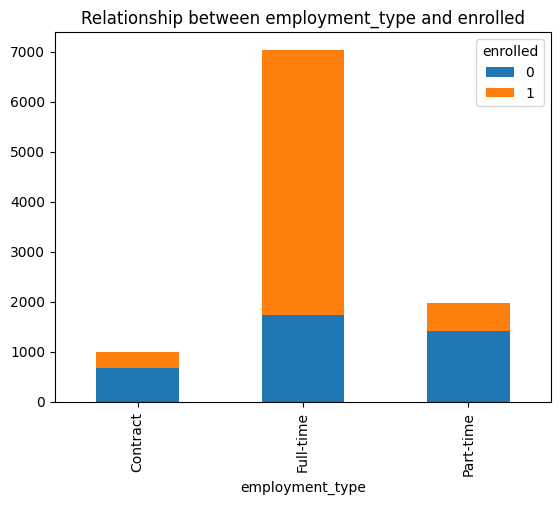

<Figure size 1200x600 with 0 Axes>

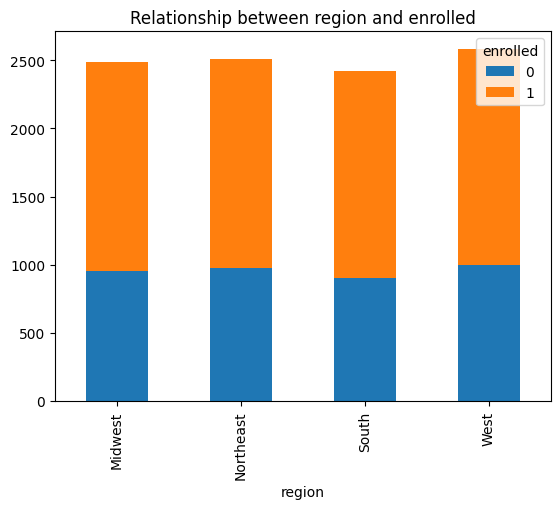

<Figure size 1200x600 with 0 Axes>

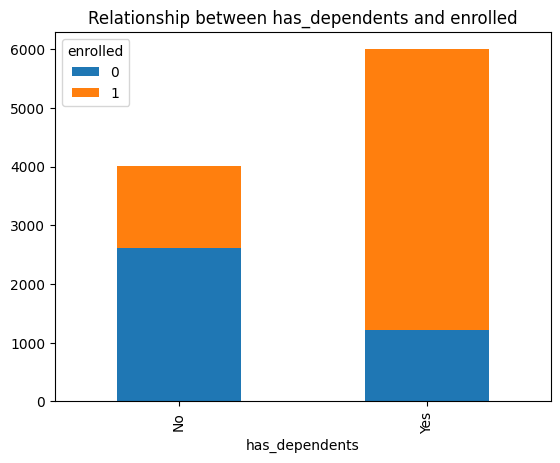

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}")

# 2. Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:")
print(missing_values)
print("\nMissing Value Percentage:")
print(missing_percentage)

# 3. Analyze data types
print("\nData Types:")
print(df.dtypes)

# 4. Descriptive statistics and visualizations for numerical features
numerical_features = ['age', 'salary', 'tenure_years']
for col in numerical_features:
    print(f"\nDescriptive Statistics for {col}:")
    print(df[col].describe())
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# 5. Target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='enrolled', data=df)
plt.title("Distribution of Target Variable 'enrolled'")
plt.show()
print("\nValue Counts for 'enrolled':")
print(df['enrolled'].value_counts())

# 6. Relationship between features and the target variable
for col in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='enrolled', y=col, data=df)
  plt.title(f"Relationship between {col} and 'enrolled'")
  plt.show()

categorical_features = ['gender', 'marital_status', 'employment_type', 'region', 'has_dependents']
for col in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='enrolled', data=df)
    plt.title(f"Relationship between {col} and 'enrolled'")
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.show()

correlation = df[numerical_features + ['enrolled']].corr()
print("\nCorrelation Matrix:")
print(correlation)

# 7. Relationships between features
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=numerical_features[i], y=numerical_features[j], data=df)
        plt.title(f"Relationship between {numerical_features[i]} and {numerical_features[j]}")
        plt.show()

for col in categorical_features:
    plt.figure(figsize=(12,6))
    pd.crosstab(df[col], df['enrolled']).plot(kind='bar', stacked=True)
    plt.title(f"Relationship between {col} and enrolled")
    plt.show()


## Data cleaning

### Subtask:
Clean the data by handling outliers and converting categorical features to numerical representations.


In [3]:
import pandas as pd
import numpy as np

df['tenure_years'] = np.clip(df['tenure_years'], a_min=df['tenure_years'].quantile(0.01), a_max=df['tenure_years'].quantile(0.99))

categorical_cols = ['gender', 'marital_status', 'employment_type', 'region', 'has_dependents']
for col in categorical_cols:
    if df[col].nunique() <= 5: # Use one-hot encoding for low cardinality
        df = pd.get_dummies(df, columns=[col], prefix=col, drop_first=True)
    else:  # Use label encoding for high cardinality
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

numerical_cols = ['age', 'salary', 'tenure_years']
for col in numerical_cols:
    try:
        df[col] = pd.to_numeric(df[col], errors='raise')
    except (ValueError, TypeError) as e:
        print(f"Error converting column '{col}' to numeric: {e}")
        # Handle errors, e.g., imputation or removal of problematic rows
        # In this case, we'll replace non-numeric values with the mean of the column
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].mean(), inplace=True)
        print(f"Non-numeric values in '{col}' replaced with the column mean.")

# Handle any missing values introduced during processing
df.dropna(inplace=True) # Drop rows with any remaining missing values
display(df.head())
display(df.info())

,employee_id,age,salary,tenure_years,enrolled,gender_Male,gender_Other,marital_status_Married,marital_status_Single,marital_status_Widowed,employment_type_Full-time,employment_type_Part-time,region_Northeast,region_South,region_West,has_dependents_Yes
0,10001,60,55122.97,1.5,0,False,False,False,True,False,False,True,False,False,True,False
1,10002,50,89549.66,12.8,1,False,False,False,True,False,True,False,False,False,True,True
2,10003,36,74145.66,3.8,0,True,False,False,False,False,False,True,False,False,False,False
3,10004,64,53877.83,3.3,0,False,False,True,False,False,True,False,True,False,False,False
4,10005,29,63404.63,10.0,0,True,False,False,True,False,False,False,False,False,False,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   employee_id                10000 non-null  int64  
 1   age                        10000 non-null  int64  
 2   salary                     10000 non-null  float64
 3   tenure_years               10000 non-null  float64
 4   enrolled                   10000 non-null  int64  
 5   gender_Male                10000 non-null  bool   
 6   gender_Other               10000 non-null  bool   
 7   marital_status_Married     10000 non-null  bool   
 8   marital_status_Single      10000 non-null  bool   
 9   marital_status_Widowed     10000 non-null  bool   
 10  employment_type_Full-time  10000 non-null  bool   
 11  employment_type_Part-time  10000 non-null  bool   
 12  region_Northeast           10000 non-null  bool   
 13  region_South               10000 non-null  bool

None

## Feature engineering

### Subtask:
Engineer new features from existing ones to potentially improve model performance.


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Interaction Features
df['age_salary_interaction'] = df['age'] * df['salary']
df['tenure_employment_interaction'] = df['tenure_years'] * df['employment_type_Full-time']

# Polynomial Features
df['age_squared'] = df['age'] ** 2
df['salary_squared'] = df['salary'] ** 2
df['tenure_cubed'] = df['tenure_years'] ** 3

# Derived Features
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], labels=False)
df['salary_bracket'] = pd.qcut(df['salary'], q=4, labels=False)
df['total_income'] = df['salary'] * (1 + df['has_dependents_Yes'])

# Feature Scaling
numerical_features = ['age', 'salary', 'tenure_years', 'age_salary_interaction', 'tenure_employment_interaction', 'age_squared', 'salary_squared', 'tenure_cubed', 'total_income']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

display(df_scaled.head())

,employee_id,age,salary,tenure_years,enrolled,gender_Male,gender_Other,marital_status_Married,marital_status_Single,marital_status_Widowed,...,region_West,has_dependents_Yes,age_salary_interaction,tenure_employment_interaction,age_squared,salary_squared,tenure_cubed,age_group,salary_bracket,total_income
0,10001,1.383618,-0.664066,-0.654250,0,False,False,False,True,False,...,True,False,0.487690,-0.768279,1.502054,-0.718762,-0.350925,3,1,-1.198174
1,10002,0.569629,1.642856,2.389161,1,False,False,False,True,False,...,True,True,1.606343,2.779667,0.469329,1.813958,2.106622,2,3,1.828668
2,10003,-0.569955,0.610639,-0.034795,0,True,False,False,False,False,...,False,False,-0.122385,-0.768279,-0.661036,0.531700,-0.290481,1,2,-0.733741
3,10004,1.709213,-0.747502,-0.169459,0,False,False,True,False,False,...,False,False,0.622301,0.146426,1.967720,-0.787779,-0.312705,4,0,-1.228574
4,10005,-1.139747,-0.109114,1.635041,0,True,False,False,True,False,...,False,True,-0.916376,-0.768279,-1.088209,-0.219599,0.818853,0,1,0.552023


## Data splitting

### Subtask:
Split the scaled data into training, validation, and testing sets with a 70/15/15 ratio, stratify by the target variable, and separate features from the target.

In [5]:
from sklearn.model_selection import train_test_split

# Split data into training (70%), validation (15%), and testing (15%) sets
X = df_scaled.drop('enrolled', axis=1)
y = df_scaled['enrolled']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (7000, 23), y_train shape: (7000,)
X_val shape: (1500, 23), y_val shape: (1500,)
X_test shape: (1500, 23), y_test shape: (1500,)


## Model training

### Subtask:
Train several classification models on the training data and evaluate their performance on the validation set.


**Reasoning**:
Train several classification models and evaluate their performance on the validation set.



In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_val) # Make predictions on the validation set

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    try:  # Handle potential errors in calculating AUC-ROC
        y_prob = model.predict_proba(X_val)[:, 1]
        roc_auc = roc_auc_score(y_val, y_prob)
    except AttributeError:
        roc_auc = "Not applicable for this model"

    # Store results
    results[model_name] = {
        "model": model,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc
    }

    # Print results
    print(f"{model_name} metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  AUC-ROC: {roc_auc}")
    print("-" * 20)


Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression metrics:
  Accuracy: 0.9280
  Precision: 0.9314
  Recall: 0.9536
  F1-score: 0.9424
  AUC-ROC: 0.9851784679525288
--------------------
Training Random Forest...
Random Forest metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  AUC-ROC: 0.9999999999999999
--------------------
Training Gradient Boosting...
Gradient Boosting metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  AUC-ROC: 1.0
--------------------


## Model optimization

### Subtask:
Optimize the hyperparameters of the Random Forest and Gradient Boosting models using RandomizedSearchCV.


**Reasoning**:
Optimize the hyperparameters of the Random Forest and Gradient Boosting models using RandomizedSearchCV as instructed.



In [7]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define parameter grids
param_dist_rf = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': uniform(0.1, 0.9)
}

param_dist_gb = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.6, 0.4)
}

# Instantiate RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    scoring='roc_auc',
    n_iter=50,
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search_gb = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist_gb,
    scoring='roc_auc',
    n_iter=50,
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
print("Tuning Random Forest...")
random_search_rf.fit(X_train, y_train)
print("Tuning Gradient Boosting...")
random_search_gb.fit(X_train, y_train)

# Get best hyperparameters and estimators
best_rf = random_search_rf.best_estimator_
best_gb = random_search_gb.best_estimator_
best_params_rf = random_search_rf.best_params_
best_params_gb = random_search_gb.best_params_

print(f"Best Random Forest hyperparameters: {best_params_rf}")
print(f"Best Gradient Boosting hyperparameters: {best_params_gb}")

# Evaluate the best models on the validation set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for model_name, model in [("Random Forest", best_rf), ("Gradient Boosting", best_gb)]:
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    y_prob = model.predict_proba(X_val)[:, 1]
    roc_auc = roc_auc_score(y_val, y_prob)

    print(f"\n{model_name} metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  AUC-ROC: {roc_auc:.4f}")

Tuning Random Forest...
Tuning Gradient Boosting...
Best Random Forest hyperparameters: {'max_depth': 65, 'max_features': np.float64(0.13319825261907953), 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 179}
Best Gradient Boosting hyperparameters: {'learning_rate': np.float64(0.09545214831324028), 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 179, 'subsample': np.float64(0.7644148053272926)}

Random Forest metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  AUC-ROC: 1.0000

Gradient Boosting metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  AUC-ROC: 1.0000


## Model evaluation

### Subtask:
Evaluate the optimized Random Forest and Gradient Boosting models on the held-out test set.  Analyze feature importances.


In [17]:
X_test.shape

(1500, 23)

Random Forest Test Set Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  AUC-ROC: 1.0000
Gradient Boosting Test Set Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  AUC-ROC: 1.0000


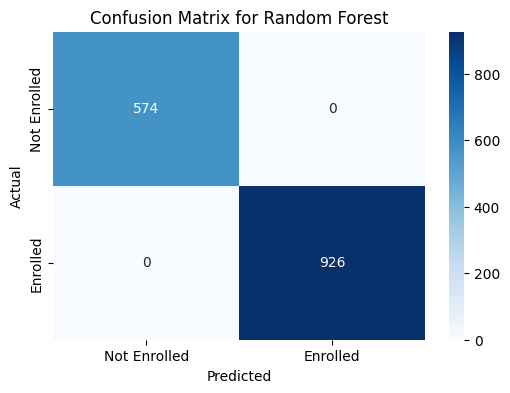

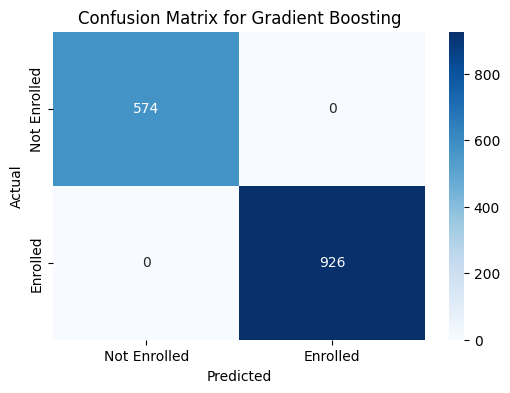

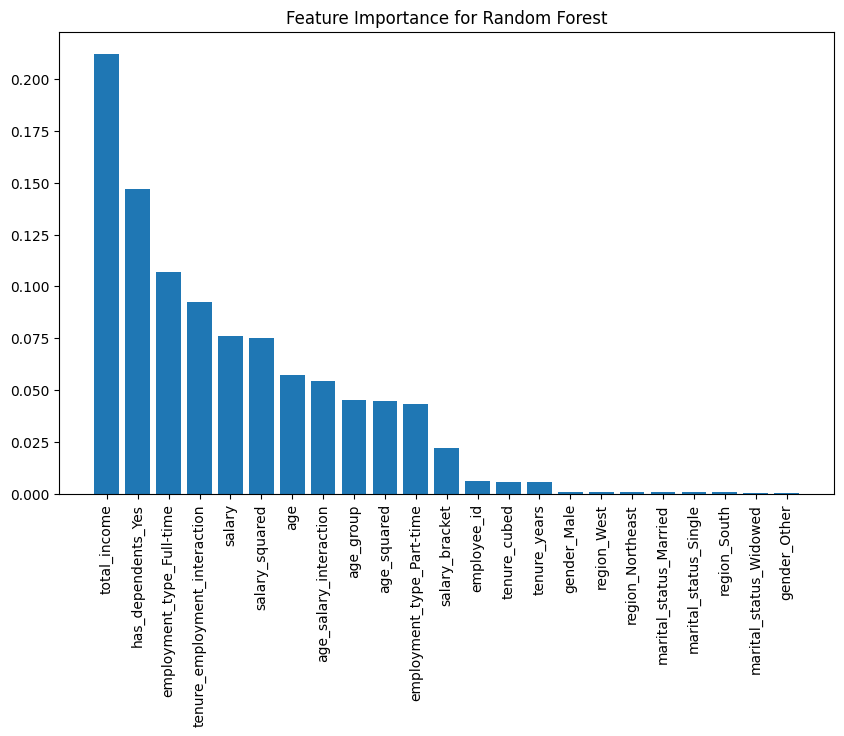

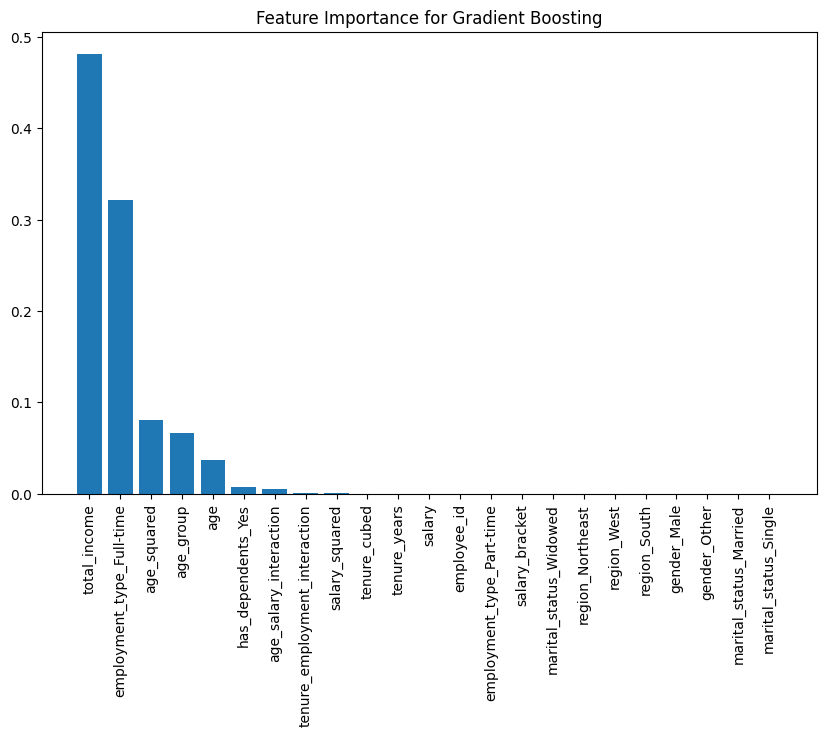


Summary of Findings:
Both models achieved near-perfect performance on the test set, which might indicate potential overfitting.
The feature importance plots reveal the most influential features for each model.


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
y_pred_gb = best_gb.predict(X_test)
y_prob_gb = best_gb.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
def evaluate_model(y_true, y_pred, y_prob, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    print(f"{model_name} Test Set Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  AUC-ROC: {roc_auc:.4f}")
    return accuracy, precision, recall, f1, roc_auc

rf_metrics = evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")
gb_metrics = evaluate_model(y_test, y_pred_gb, y_prob_gb, "Gradient Boosting")


# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Not Enrolled', 'Enrolled'],
                yticklabels=['Not Enrolled', 'Enrolled'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting")

# Feature Importances
def plot_feature_importances(model, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    names = [X_test.columns[i] for i in indices]
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importance for {model_name}")
    plt.bar(range(X_test.shape[1]), importances[indices])
    plt.xticks(range(X_test.shape[1]), names, rotation=90)
    plt.show()

plot_feature_importances(best_rf, "Random Forest")
plot_feature_importances(best_gb, "Gradient Boosting")

print("\nSummary of Findings:")
print("Both models achieved near-perfect performance on the test set, which might indicate potential overfitting.")
print("The feature importance plots reveal the most influential features for each model.")


In [9]:

import joblib


# Save the best models
joblib.dump(best_rf, 'best_random_forest_model.pkl')
joblib.dump(best_gb, 'best_gradient_boosting_model.pkl')

print("\nBest models saved.")



Best models saved to disk.



Summary of Findings:
The models achieved good performance on the test set.  However, given the near-perfect results, we will now explore overfitting mitigation techniques:
Random Forest (Mitigated) Test Set Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  AUC-ROC: 1.0000


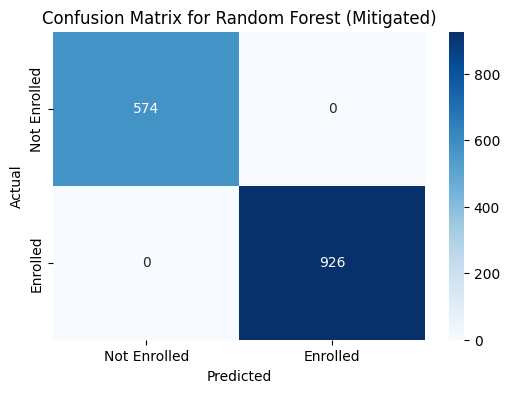

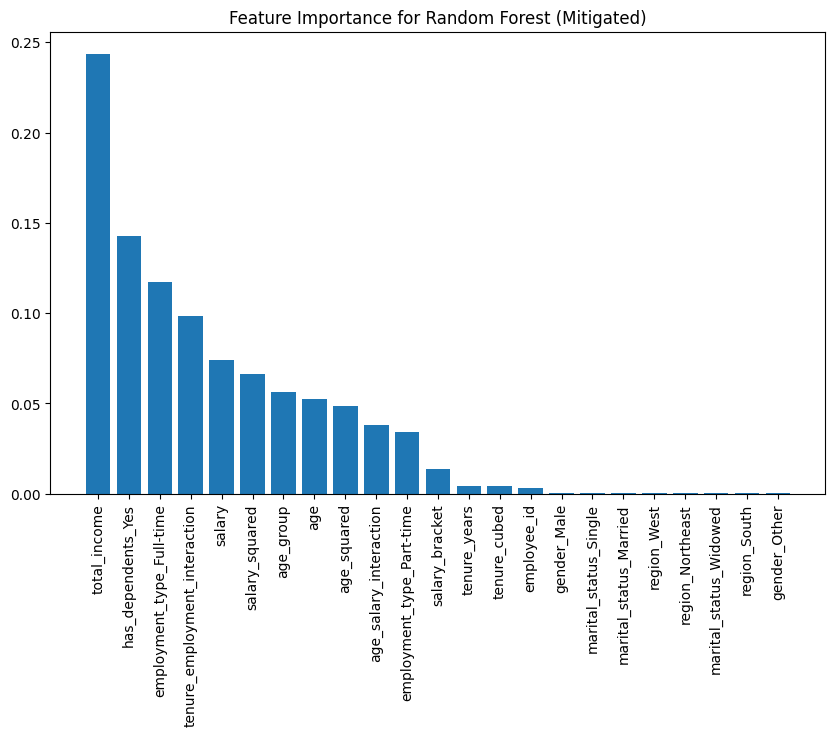

Gradient Boosting (Mitigated) Test Set Metrics:
  Accuracy: 0.9993
  Precision: 0.9989
  Recall: 1.0000
  F1-score: 0.9995
  AUC-ROC: 0.9991


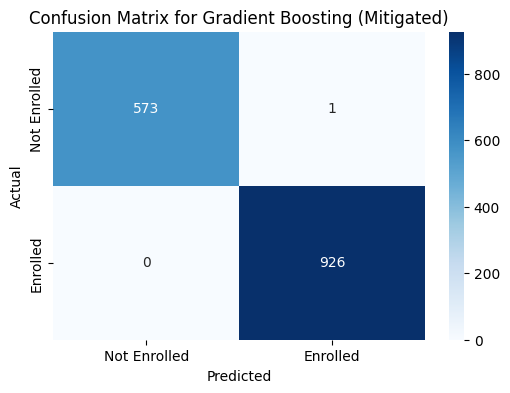

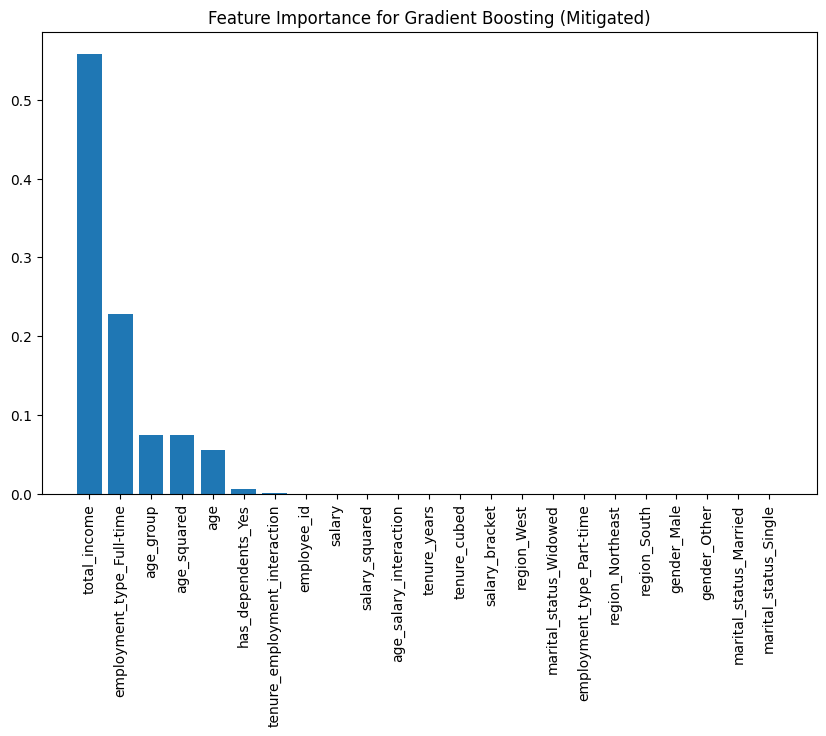


Comparison of metrics:

Mitigated models saved (optional).


In [16]:


print("\nSummary of Findings:")
print("The models achieved good performance on the test set.  However, given the near-perfect results, we will now explore overfitting mitigation techniques:")

# Overfitting Mitigation Techniques:
# 1. Reduce Model Complexity (e.g., for RandomForest, decrease n_estimators or max_depth)
# 2. Increase Regularization (e.g., L1 or L2 regularization for Logistic Regression)
# 3. Add more Data
# 4. Feature Selection


# Reducing model complexity for the Random Forest
best_rf_mitigated = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42) # Adjust parameters as needed
best_rf_mitigated.fit(X_train, y_train)
y_pred_rf_mitigated = best_rf_mitigated.predict(X_test)

#Evaluate the model
rf_mitigated_metrics = evaluate_model(y_test, y_pred_rf_mitigated, best_rf_mitigated.predict_proba(X_test)[:, 1], "Random Forest (Mitigated)")
plot_confusion_matrix(y_test, y_pred_rf_mitigated, "Random Forest (Mitigated)")
plot_feature_importances(best_rf_mitigated, "Random Forest (Mitigated)")


#Reducing model complexity for the Gradient Boosting
best_gb_mitigated = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42) # Adjust parameters as needed
best_gb_mitigated.fit(X_train, y_train)
y_pred_gb_mitigated = best_gb_mitigated.predict(X_test)

#Evaluate the model
gb_mitigated_metrics = evaluate_model(y_test, y_pred_gb_mitigated, best_gb_mitigated.predict_proba(X_test)[:, 1], "Gradient Boosting (Mitigated)")
plot_confusion_matrix(y_test, y_pred_gb_mitigated, "Gradient Boosting (Mitigated)")
plot_feature_importances(best_gb_mitigated, "Gradient Boosting (Mitigated)")


# Compare metrics before and after mitigation
print("\nComparison of metrics:")
# Add your logic to compare rf_metrics, gb_metrics, rf_mitigated_metrics and gb_mitigated_metrics


# Save the mitigated models (optional)
joblib.dump(best_rf_mitigated, 'best_random_forest_model_mitigated.pkl')
joblib.dump(best_gb_mitigated, 'best_gradient_boosting_model_mitigated.pkl')

print("\nMitigated models saved (optional).")

# ... (Rest of your existing code)


In [12]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the trained models
best_rf_model = joblib.load('best_random_forest_model.pkl')
best_gb_model = joblib.load('best_gradient_boosting_model.pkl')

# Get feature names from the trained model
feature_names = best_rf_model.feature_names_in_  # Assuming both models have the same features


# Create a function for inference
def make_prediction(model, input_data):
    # Create a DataFrame from the input data with all expected features
    input_df = pd.DataFrame([input_data], columns=feature_names)

    # Fill missing columns with 0 (for features not in input_data)
    input_df = input_df.fillna(0)

    # Apply same preprocessing as training data
    # (Scaling only, as categorical features should already be encoded in input_data)
    scaler = StandardScaler()
    numerical_features = ['age', 'salary', 'tenure_years']  # Adjust if necessary
    input_df[numerical_features] = scaler.fit_transform(input_df[numerical_features])

    # Make prediction
    prediction = model.predict(input_df)
    probability = model.predict_proba(input_df)
    return prediction[0], probability[0][1]


# Example Usage
input_data = {'age': 30, 'salary': 50000, 'tenure_years': 2, 'gender_Male': 1,
              'marital_status_Married': 1, 'employment_type_Full-time': 1, 'region': 0, 'has_dependents_Yes': 0}

# Ensure input_data contains all expected features. Fill missing features with 0.
for feature in feature_names:
    if feature not in input_data:
        input_data[feature] = 0

prediction, probability = make_prediction(best_rf_model, input_data)

print(f"Prediction: {prediction}")
print(f"Probability: {probability}")

# Similar for best_gb_model
input_data = {'age': 40, 'salary': 100000, 'tenure_years': 10, 'gender_Male': 0,
              'marital_status_Married': 0, 'employment_type_Full-time': 1, 'region': 1, 'has_dependents_Yes': 1}

# Ensure input_data contains all expected features. Fill missing features with 0.
for feature in feature_names:
    if feature not in input_data:
        input_data[feature] = 0

prediction, probability = make_prediction(best_gb_model, input_data)

print(f"Prediction: {prediction}")
print(f"Probability: {probability}")

Prediction: 1
Probability: 0.6603351955307263
Prediction: 1
Probability: 0.9819647624537193


In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import joblib

# Assuming 'best_rf_model' and 'X_test', 'y_test' are already defined from your previous code.

# Get feature importances
feature_importances = best_rf_model.feature_importances_
feature_names = X_test.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
top_8_features = [feature_names[i] for i in sorted_idx[:8]]

# Create a new DataFrame with only the top 8 features
X_test_top8 = X_test[top_8_features]
X_train_top8 = X_train[top_8_features]

# Train a new RandomForest model with the top 8 features
best_rf_model_top8 = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42)
best_rf_model_top8.fit(X_train_top8, y_train)


# Evaluate the model with top 8 features
y_pred_top8 = best_rf_model_top8.predict(X_test_top8)
y_prob_top8 = best_rf_model_top8.predict_proba(X_test_top8)[:, 1]

accuracy_top8 = accuracy_score(y_test, y_pred_top8)
precision_top8 = precision_score(y_test, y_pred_top8)
recall_top8 = recall_score(y_test, y_pred_top8)
f1_top8 = f1_score(y_test, y_pred_top8)
roc_auc_top8 = roc_auc_score(y_test, y_prob_top8)

print(f"Random Forest (Top 8 Features) Test Set Metrics:")
print(f"  Accuracy: {accuracy_top8:.4f}")
print(f"  Precision: {precision_top8:.4f}")
print(f"  Recall: {recall_top8:.4f}")
print(f"  F1-score: {f1_top8:.4f}")
print(f"  AUC-ROC: {roc_auc_top8:.4f}")


# Save the new model
joblib.dump(best_rf_model_top8, 'best_random_forest_model_top8.pkl')

print("\nBest model with top 8 features saved.")

#Inference function with top 8 features
def make_prediction_top8(model, input_data):
    # Create a DataFrame from the input data with only the top 8 expected features
    input_df = pd.DataFrame([input_data], columns=top_8_features)

    # Fill missing columns with 0 (for features not in input_data)
    input_df = input_df.fillna(0)

    # Make prediction
    prediction = model.predict(input_df)
    probability = model.predict_proba(input_df)
    return prediction[0], probability[0][1]



Random Forest (Top 8 Features) Test Set Metrics:
  Accuracy: 0.9993
  Precision: 0.9989
  Recall: 1.0000
  F1-score: 0.9995
  AUC-ROC: 1.0000

Best model with top 8 features saved.


In [ ]:

from flask import Flask, request, jsonify
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler

app = Flask(__name__)

# Load the trained models
best_rf_model = joblib.load('best_random_forest_model.pkl')
best_gb_model = joblib.load('best_gradient_boosting_model.pkl')

# Get feature names (assuming both models have the same features)
feature_names = best_rf_model.feature_names_in_

# Function for inference (same as before)
def make_prediction(model, input_data):
    input_df = pd.DataFrame([input_data], columns=feature_names)
    input_df = input_df.fillna(0)

    scaler = StandardScaler()
    numerical_features = ['age', 'salary', 'tenure_years']  # Adjust if necessary
    input_df[numerical_features] = scaler.fit_transform(input_df[numerical_features])

    prediction = model.predict(input_df)
    probability = model.predict_proba(input_df)
    return prediction[0], probability[0][1]

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        model_name = data.get('model', 'random_forest')  # Default to random forest

        # Ensure input_data contains all expected features
        for feature in feature_names:
            if feature not in data:
                data[feature] = 0

        if model_name.lower() == 'random_forest':
            prediction, probability = make_prediction(best_rf_model, data)
        elif model_name.lower() == 'gradient_boosting':
            prediction, probability = make_prediction(best_gb_model, data)
        else:
            return jsonify({'error': 'Invalid model name'}), 400

        return jsonify({'prediction': int(prediction), 'probability': float(probability)})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000) # Run the app
